In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')

In [2]:
# connecting to the database
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [3]:
cursor.execute("""select name from sqlite_master where type = 'table';""")
print("Airline Dataset Tables")

#performing a list comprehension
table_list = [table[0] for table in cursor.fetchall()]
table_list

Airline Dataset Tables


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [4]:
# Now we explore the dataset and tables present in it.

In [5]:
aircrafts_data = pd.read_sql_query(f"""SELECT * FROM aircrafts_data""", connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [6]:
airports_data = pd.read_sql_query(f"""SELECT * FROM airports_data""", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [7]:
boarding_passes = pd.read_sql_query(f"""SELECT * FROM boarding_passes""", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [8]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings""", connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [9]:
flights = pd.read_sql_query(f"""SELECT * FROM flights""", connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [10]:
seats = pd.read_sql_query(f"""SELECT * FROM seats""", connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [11]:
ticket_flights = pd.read_sql_query(f"""SELECT * FROM ticket_flights""", connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [12]:
tickets = pd.read_sql_query(f"""SELECT * FROM tickets""", connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [13]:
for table_name in table_list:
    print(f"Schema of {table_name}:")
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    for column in columns:
        print(column)
    print("\n")

Schema of aircrafts_data:
(0, 'aircraft_code', 'character(3)', 1, None, 0)
(1, 'model', 'jsonb', 1, None, 0)
(2, 'range', 'INTEGER', 1, None, 0)


Schema of airports_data:
(0, 'airport_code', 'character(3)', 1, None, 0)
(1, 'airport_name', 'jsonb', 1, None, 0)
(2, 'city', 'jsonb', 1, None, 0)
(3, 'coordinates', 'point', 1, None, 0)
(4, 'timezone', 'TEXT', 1, None, 0)


Schema of boarding_passes:
(0, 'ticket_no', 'character(13)', 1, None, 0)
(1, 'flight_id', 'INTEGER', 1, None, 0)
(2, 'boarding_no', 'INTEGER', 1, None, 0)
(3, 'seat_no', 'character varying(4)', 1, None, 0)


Schema of bookings:
(0, 'book_ref', 'character(6)', 1, None, 0)
(1, 'book_date', 'timestamp with time zone', 1, None, 0)
(2, 'total_amount', 'numeric(10,2)', 1, None, 0)


Schema of flights:
(0, 'flight_id', 'INTEGER', 1, None, 0)
(1, 'flight_no', 'character(6)', 1, None, 0)
(2, 'scheduled_departure', 'timestamp with time zone', 1, None, 0)
(3, 'scheduled_arrival', 'timestamp with time zone', 1, None, 0)
(4, 'departu

In [14]:
#fetching the schema of the tables
for table_name in table_list:
    print(f"Schema of {table_name}:")
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    for column in columns:
        print(column[1:3])
    print("\n")

Schema of aircrafts_data:
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')


Schema of airports_data:
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')


Schema of boarding_passes:
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')


Schema of bookings:
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')


Schema of flights:
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')


Schema of seats:
('aircraft_code', 'character(3)')
('se

In [15]:
# check for missing values
for table in table_list:
    print(f"\n{table}")
    df_table = pd.read_sql_query(f"""SELECT * from {table}""",connection)
    print(df_table.isnull().sum())



aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


## `Basic Insights`

In [16]:
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [17]:
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


# 1. How many planes have more than 100 seats?

In [18]:
plane_seats = pd.read_sql_query(f"""SELECT aircraft_code, count(seat_no) AS Seats_count from seats GROUP BY aircraft_code 
HAVING Seats_count > 100""",connection)
plane_seats

,aircraft_code,Seats_count
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


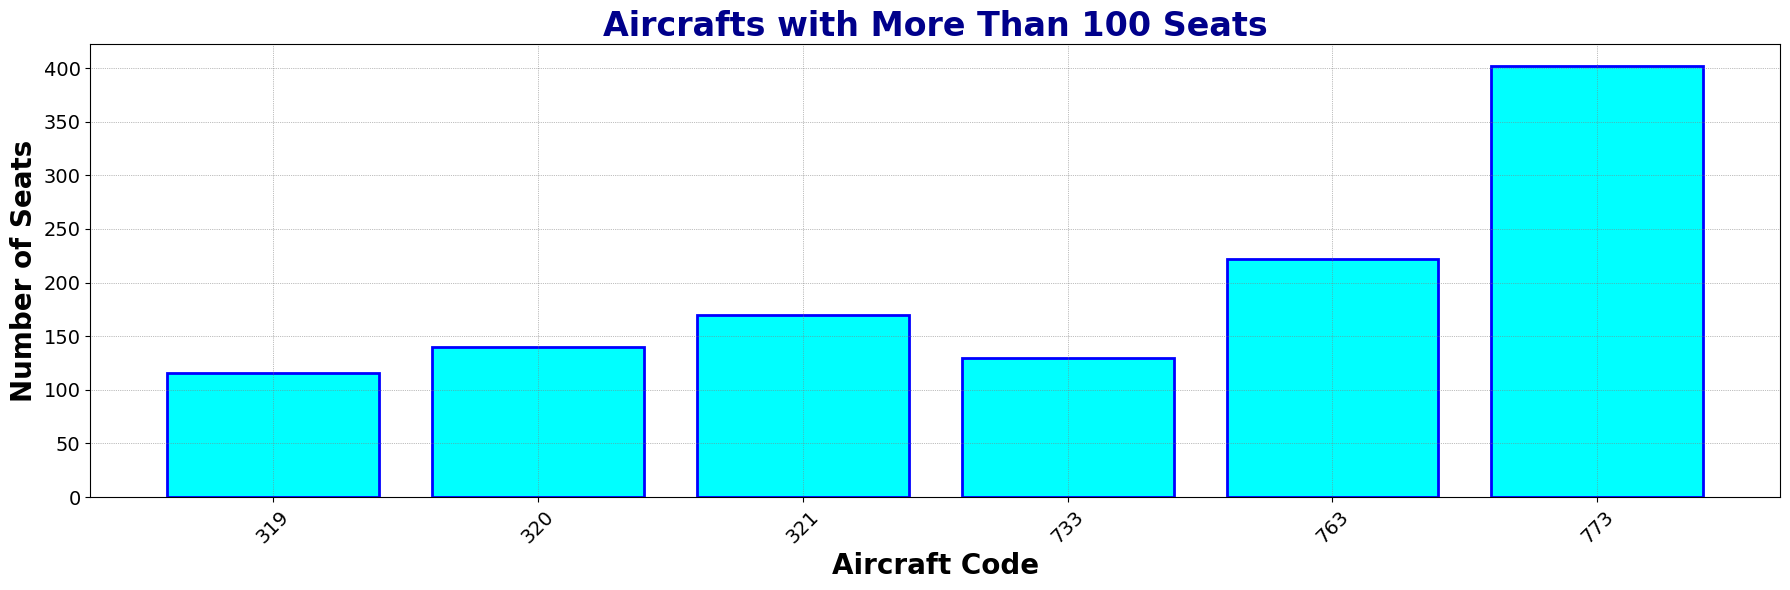

In [19]:
plane_seats
plt.figure(figsize=(18,6))

# Bar plot with customized design
plt.bar(plane_seats['aircraft_code'], plane_seats['Seats_count'], color='cyan', edgecolor='blue', linewidth=2)

# Labels and Title with styling
plt.xlabel('Aircraft Code', fontsize=20, fontweight='bold')
plt.ylabel('Number of Seats', fontsize=20, fontweight='bold')
plt.title('Aircrafts with More Than 100 Seats', fontsize=24, fontweight='bold', color='darkblue')

# Customize the ticks
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Add grid lines with custom styling
plt.grid(color='gray', linestyle=':', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#  How has the number of tickets booked and total amount earned changed over time?

In [20]:
# 2a. How has the number of tickets booked changed over time?
tickets_booked = pd.read_sql_query(f"""SELECT *
                                    FROM tickets
                                    INNER JOIN bookings 
                                    ON tickets.book_ref=bookings.book_ref;""", connection)
# tickets_booked.dtypes
tickets_booked['book_date'] = pd.to_datetime(tickets_booked['book_date'])
tickets_booked['date'] = tickets_booked['book_date'].dt.date

#here , we convert the datatype of book_date into datetime and then extract the date only

In [21]:
tickets_booked

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


In [22]:
#grouping the table by date and finding total bookings done per date
tickets_booked.groupby('date')[['ticket_no']].count().head()

,ticket_no
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266


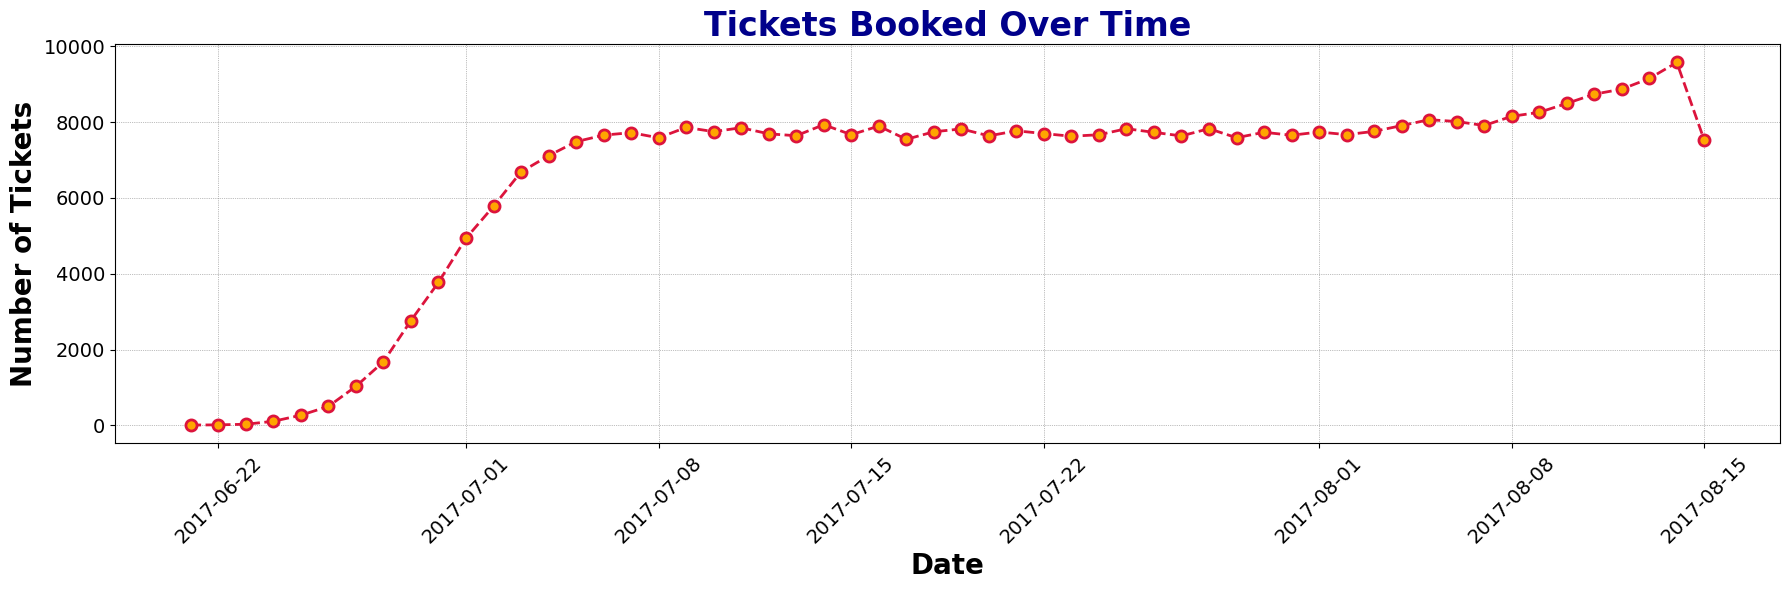

In [23]:
x = tickets_booked.groupby('date')[['date']].count()

plt.figure(figsize=(18,6))

plt.plot(x.index, x['date'], marker='o', linestyle='--', color='crimson', linewidth=2, markersize=8, markerfacecolor='orange', markeredgewidth=2)
plt.xlabel('Date', fontsize=20, fontweight='bold')
plt.ylabel('Number of Tickets', fontsize=20, fontweight='bold')
plt.title('Tickets Booked Over Time', fontsize=24, fontweight='bold', color='darkblue')

plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()  
plt.show()

#### The above analysis shows a gradual increase in ticket bookings from `June 22nd` to `July 7th`, followed by a stable pattern until `August`.
       These findings suggest that further exploration of the factors contributing to the peak in ticket bookings may be beneficial for increasing overall revenue and optimizing operational strategies.

In [24]:
# 2b. How has the total amount earned changed over time?
amt = pd.read_sql_query(f"""SELECT * from bookings""", connection)
# amt.dtypes
amt['book_date'] = pd.to_datetime(amt['book_date'])
amt['date'] = amt['book_date'].dt.date


In [25]:
#grouping the table by date and finding total income done per day
amt.groupby('date')[['total_amount']].sum().head()

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400


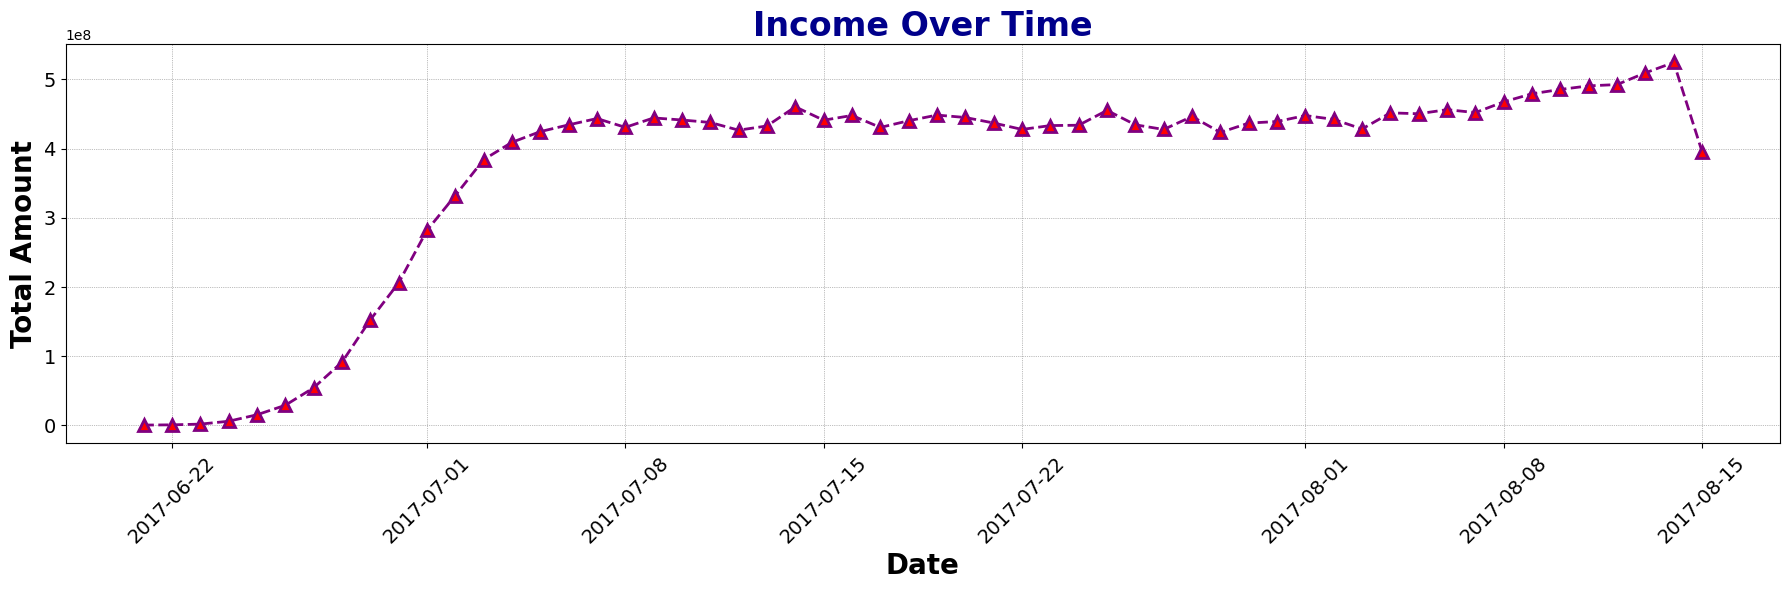

In [26]:
y = amt.groupby('date')[['total_amount']].sum()

plt.figure(figsize=(18,6))

plt.plot(y.index, y['total_amount'], marker='^', linestyle='--', color='purple', linewidth=2, markersize=8, markerfacecolor='red', markeredgewidth=2)
plt.xlabel('Date', fontsize=20, fontweight='bold')
plt.ylabel('Total Amount', fontsize=20, fontweight='bold')
plt.title('Income Over Time', fontsize=24, fontweight='bold', color='darkblue')

plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()  
plt.show()

# 3. Calculate the average charges for each aircraft under different fare conditions.

In [27]:
avg_aircraft_charges = pd.read_sql(f"""
SELECT aircraft_code,fare_conditions,AVG(amount) AS Average_Charges FROM ticket_flights JOIN flights 
ON ticket_flights.flight_id = flights.flight_id
GROUP BY aircraft_code,fare_conditions""", connection)
avg_aircraft_charges

,aircraft_code,fare_conditions,Average_Charges
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


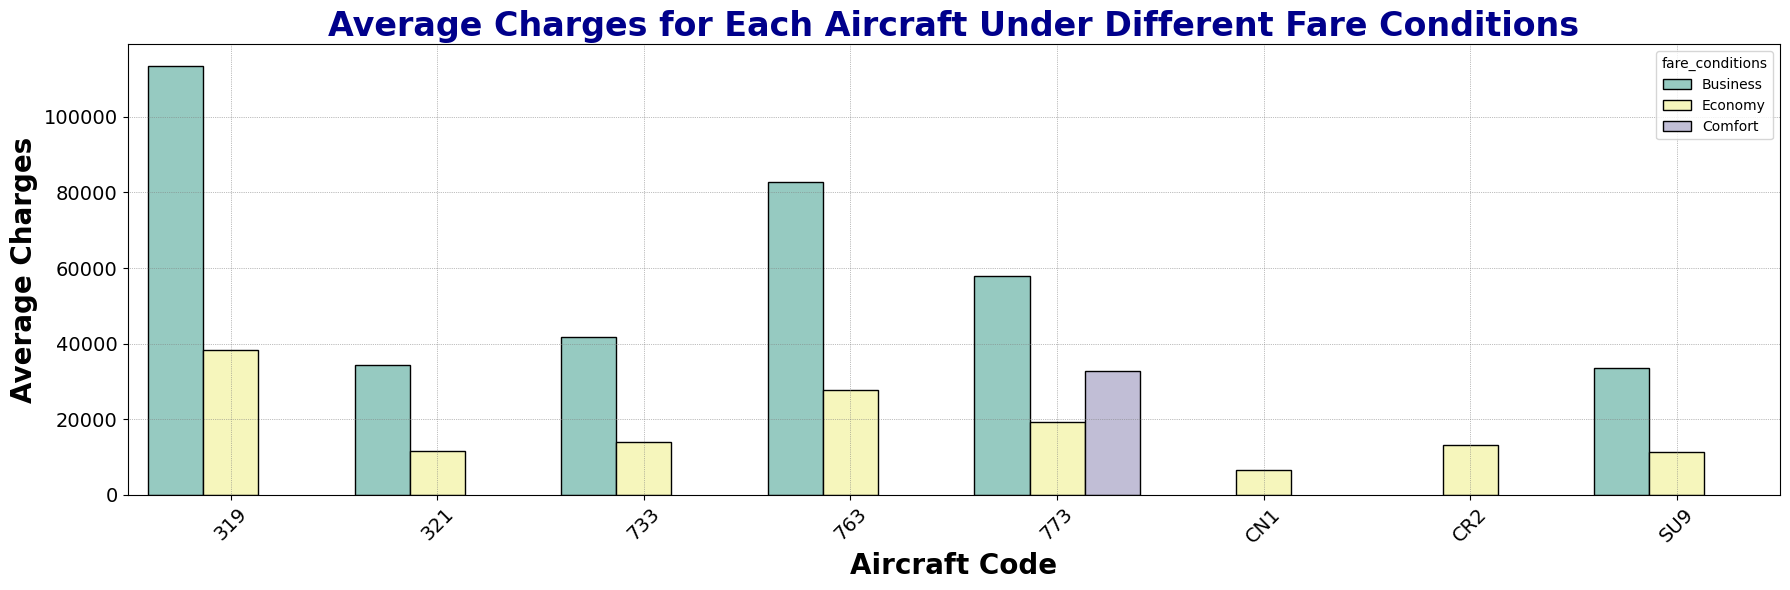

In [28]:
plt.figure(figsize=(18, 6))
sns.barplot(data=avg_aircraft_charges, x='aircraft_code', y='Average_Charges', hue='fare_conditions', palette='Set3', edgecolor='black')

plt.xlabel('Aircraft Code', fontsize=20, fontweight='bold')
plt.ylabel('Average Charges', fontsize=20, fontweight='bold')
plt.title('Average Charges for Each Aircraft Under Different Fare Conditions', fontsize=24, fontweight='bold', color='darkblue')

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.tight_layout()

plt.show()

#### The above bar chart shows 2 aircrafts coded as `CN1` and `CR2` that have only Economy Class , whereas Only Aircraft coded `773` has a separate `Comfort class`. 
 * #### Aircraft coded `319` , has higher charges in terms of both economic and buisness class seats , compared to other flights

## Basic Data Analysis Overview:

* Identified the number of planes with more than 100 seats and listed the count of seats for each aircraft.
* Analyzed changes in the number of tickets booked and the total amount earned over time.
* Calculated the average fare for each aircraft under different fare conditions (e.g., economy, business, comfort).

### Occupancy and Pricing Strategy Development:

* **`Trend in Ticket Bookings and Revenue`**:

  * A line chart was created to visualize the trend of ticket bookings and the revenue earned.
  * The analysis showed a **gradual increase in ticket bookings from June 22nd to July 7th, followed by a stable pattern until    August.**
  * A peak in ticket bookings was observed on a single day, highlighting the potential for further exploration to identify   contributing factors and improve revenue generation.
  * A similar trend was observed in total revenue, reflecting its close relationship with ticket bookings.

* **`Fare Conditions and Average Costs`**:

  * A bar graph was generated to compare the average costs for different fare conditions across various aircraft.
  * The analysis highlighted that business class charges are consistently higher than economy class across all aircraft.
  * **Comfort class is available only in 773 aircraft, while CN1 and CR2 planes offer only economy class.**
  
#### These insights could be useful for future pricing strategies and fare optimization.

## `Analysing Occupancy Rate`

## 4. For each aircraft, we calculate the total revenue per year and the average revenue per ticket.

In [29]:
avg_rev = pd.read_sql_query(f"""
SELECT aircraft_code, Total_Revenue, Tickets_count, Total_Revenue/Tickets_count as Avg_Aircraft_Revenue
FROM(SELECT aircraft_code,SUM(amount) as Total_Revenue,Count(ticket_no) as Tickets_Count
from ticket_flights JOIN flights 
ON ticket_flights.flight_id = flights.flight_id
GROUP BY aircraft_code) AS Revenue_Status ;""", connection)

avg_rev

,aircraft_code,Total_Revenue,Tickets_Count,Avg_Aircraft_Revenue
0,319,2706163100,52853,51201
1,321,1638164100,107129,15291
2,733,1426552100,86102,16568
3,763,4371277100,124774,35033
4,773,3431205500,144376,23765
5,CN1,96373800,14672,6568
6,CR2,1982760500,150122,13207
7,SU9,5114484700,365698,13985


## 5. Calculate the average occupancy per aircraft.

In [30]:
#finding the total no of seats in an aircraft
Total_seats = pd.read_sql_query(f"""
SELECT aircraft_code, COUNT(seat_no) AS Seats
FROM seats GROUP BY aircraft_code
""", connection)
Total_seats

,aircraft_code,Seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [31]:
#finding the no of booked seats in an aircraft

Total_booked_seats = pd.read_sql_query(f"""
SELECT aircraft_code,b.flight_id, COUNT(seat_no) AS Seats_Booked
FROM boarding_passes AS b INNER JOIN flights AS f
ON b.flight_id = f.flight_id 
GROUP BY aircraft_code,f.flight_id
""", connection)
Total_booked_seats


,aircraft_code,flight_id,Seats_Booked
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [32]:
Occupancy_Rate = pd.read_sql_query(f"""
SELECT ts.aircraft_code,ts.seats as Total_seats,ROUND(AVG(tbs.Seats_Booked),0) AS Average_Seat_Bookings,
ROUND((AVG(tbs.Seats_booked)/ts.seats*100),2) AS Occupancy_Rate FROM 
(SELECT aircraft_code, COUNT(seat_no) AS Seats
FROM seats GROUP BY aircraft_code) AS ts 
INNER JOIN 
(SELECT aircraft_code,b.flight_id, COUNT(seat_no) AS Seats_Booked
FROM boarding_passes AS b INNER JOIN flights AS f
ON b.flight_id = f.flight_id 
GROUP BY aircraft_code,f.flight_id) AS tbs
ON ts.aircraft_code = tbs.aircraft_code
GROUP BY ts.aircraft_code;
""", connection)
Occupancy_Rate

,aircraft_code,Total_seats,Average_Seat_Bookings,Occupancy_Rate
0,319,116,54.0,46.19
1,321,170,89.0,52.24
2,733,130,80.0,61.73
3,763,222,114.0,51.32
4,773,402,265.0,65.90
5,CN1,12,6.0,50.04
6,CR2,50,21.0,42.97
7,SU9,97,57.0,58.57


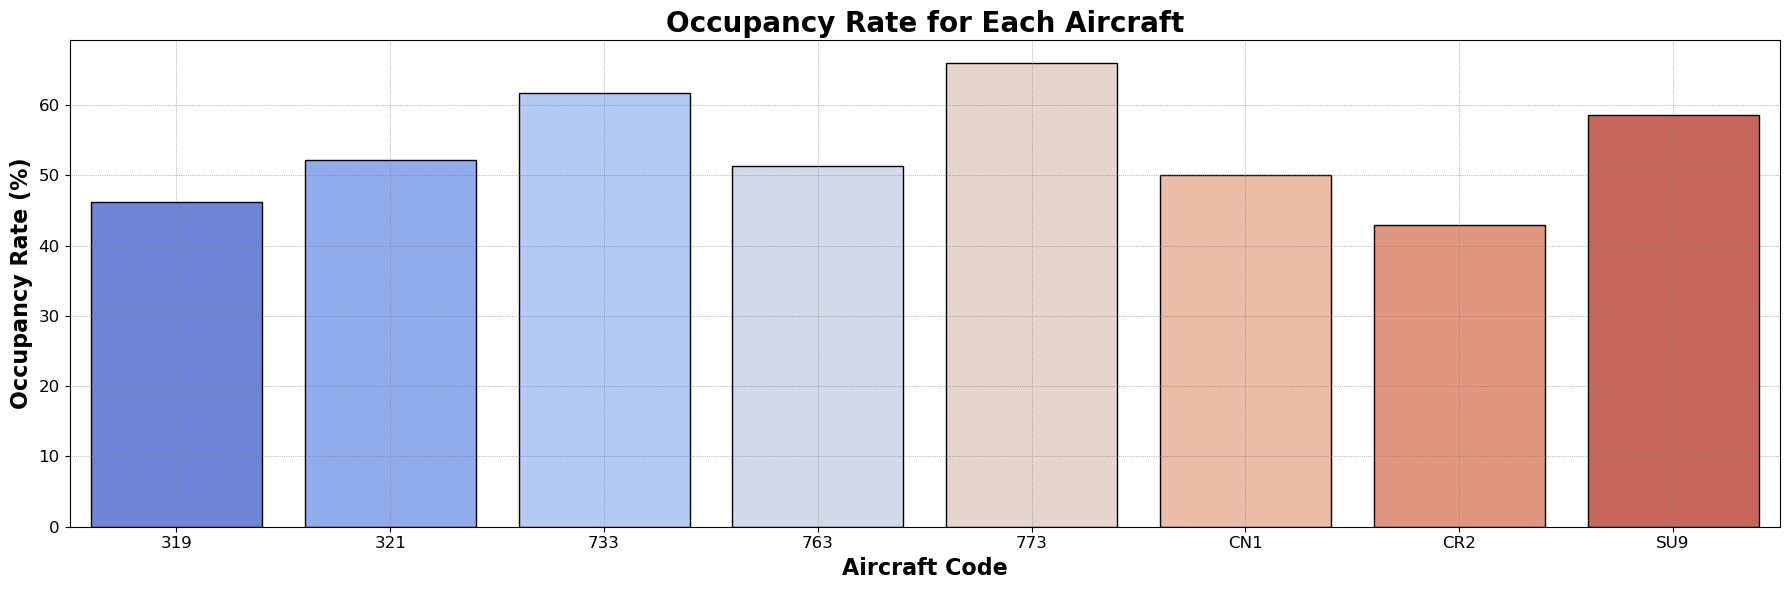

In [33]:
plt.figure(figsize=(18,6))
sns.barplot(data=Occupancy_Rate, x='aircraft_code', y='Occupancy_Rate', palette='coolwarm', edgecolor='black')

# Adding labels and title
plt.xlabel('Aircraft Code', fontsize=16, fontweight='bold')
plt.ylabel('Occupancy Rate (%)', fontsize=16, fontweight='bold')
plt.title('Occupancy Rate for Each Aircraft', fontsize=20, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(color='gray', linestyle=':', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

### The above barplot uses a gradient-based color palette (coolwarm) was used to visually distinguish the aircraft types.
   * Aircraft `733` and `773` shows caparatively higher Occupancy Rates compared to others, while **`Aircraft 773`** stands out at peak. 
   * This plot helps in quickly identifying which aircraft have higher or lower occupancy rates, allowing us to target specific planes for improvements in marketing, route planning, or seat optimization. 
   * While observing the Average costs of flights uopn different fare conditions, we observed that  **Comfort class is available in only `Aircraft 773`** it's avg charges were comparatively less.

## 6. Now we calculate by how much the total annual turnover could increase by giving all aircraft a `10%` higher occupancy rate.

In [34]:
#a. We first calculate total revenue per aircraft
pd.read_sql_query("""
SELECT aircraft_code, SUM(amount) as total_revenue  
FROM ticket_flights JOIN flights 
ON ticket_flights.flight_id=flights.flight_id 
GROUP BY aircraft_code
""", connection)

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [35]:
#b. Increase occupancy rate by 10%
Occupancy_Rate['Occupancy Rate Inc_10'] = Occupancy_Rate['Occupancy_Rate'] + Occupancy_Rate['Occupancy_Rate']*0.1
Occupancy_Rate

,aircraft_code,Total_seats,Average_Seat_Bookings,Occupancy_Rate,Occupancy Rate Inc_10
0,319,116,54.0,46.19,50.809
1,321,170,89.0,52.24,57.464
2,733,130,80.0,61.73,67.903
3,763,222,114.0,51.32,56.452
4,773,402,265.0,65.90,72.490
5,CN1,12,6.0,50.04,55.044
6,CR2,50,21.0,42.97,47.267
7,SU9,97,57.0,58.57,64.427


In [37]:
pd.set_option("display.float_format",str)

In [38]:
#3. Adding a new Increased Turnover Column due to a 10% increase in Occupancy Rate
annual_turnover = pd.read_sql_query("""
SELECT aircraft_code, SUM(amount) as total_revenue  
FROM ticket_flights JOIN flights 
ON ticket_flights.flight_id=flights.flight_id 
GROUP BY aircraft_code
""", connection)

Occupancy_Rate['Total Annual Turnover Inc_10'] = (annual_turnover['total_revenue']/Occupancy_Rate['Occupancy_Rate'])*Occupancy_Rate['Occupancy Rate Inc_10']
Occupancy_Rate

,aircraft_code,Total_seats,Average_Seat_Bookings,Occupancy_Rate,Occupancy Rate Inc_10,Total Annual Turnover Inc_10
0,319,116,54.0,46.19,50.809,2976779410.0
1,321,170,89.0,52.24,57.464,1801980510.0
2,733,130,80.0,61.73,67.90299999999999,1569207310.0
3,763,222,114.0,51.32,56.452,4808404810.0
4,773,402,265.0,65.9,72.49000000000001,3774326050.0
5,CN1,12,6.0,50.04,55.044,106011179.99999999
6,CR2,50,21.0,42.97,47.266999999999996,2181036550.0
7,SU9,97,57.0,58.57,64.427,5625933170.000001


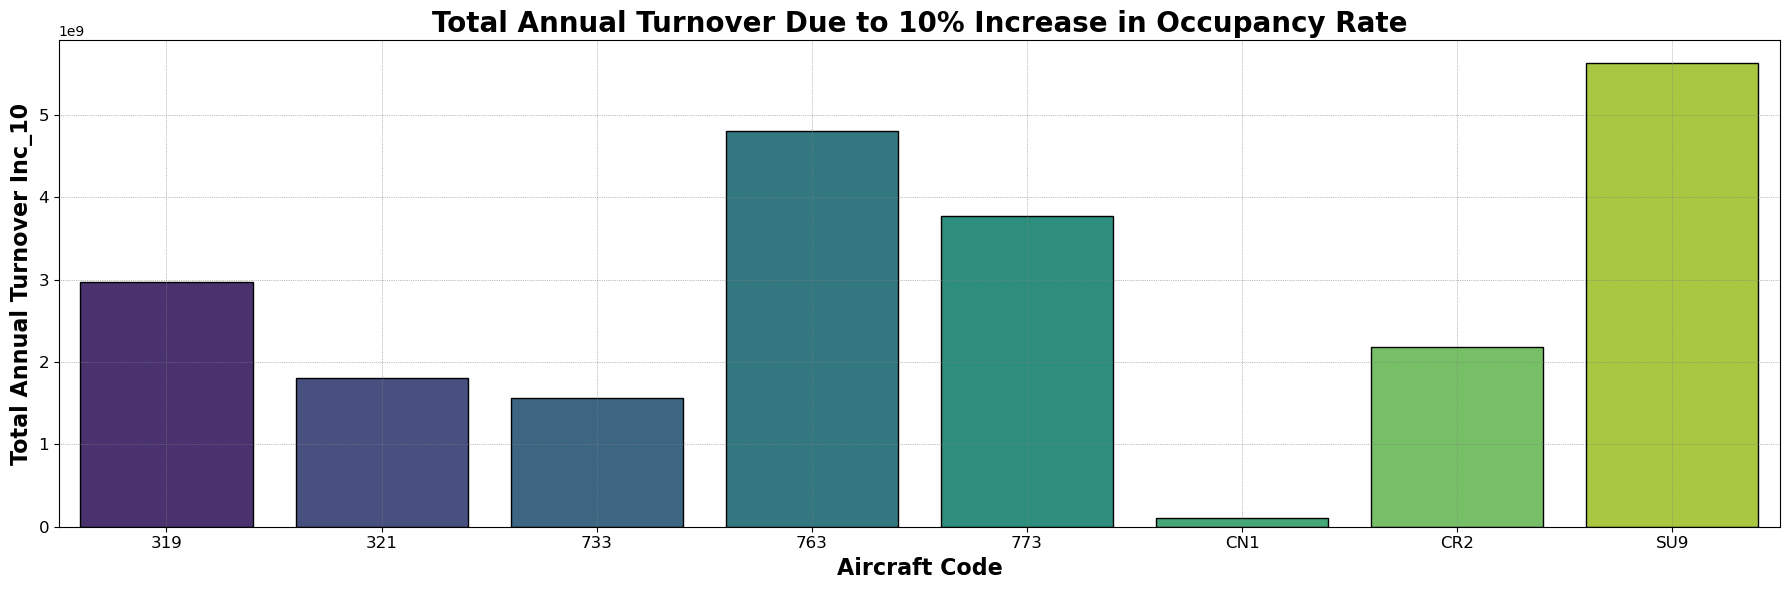

In [40]:
# Plotting the bar plot to visualize the total annual turnover due to a 10% increase in occupancy rate
plt.figure(figsize=(18,6))
sns.barplot(data=Occupancy_Rate, x='aircraft_code', y='Total Annual Turnover Inc_10', palette='viridis', edgecolor='black')

# Adding labels and title
plt.xlabel('Aircraft Code', fontsize=16, fontweight='bold')
plt.ylabel('Total Annual Turnover Inc_10', fontsize=16, fontweight='bold')
plt.title('Total Annual Turnover Due to 10% Increase in Occupancy Rate', fontsize=20, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(color='gray', linestyle=':', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [43]:
annual_turnover

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [44]:
merged_df

,aircraft_code,total_revenue,Total Annual Turnover Inc_10
0,319,2706163100,2976779410.0
1,321,1638164100,1801980510.0
2,733,1426552100,1569207310.0
3,763,4371277100,4808404810.0
4,773,3431205500,3774326050.0
5,CN1,96373800,106011179.99999999
6,CR2,1982760500,2181036550.0
7,SU9,5114484700,5625933170.000001


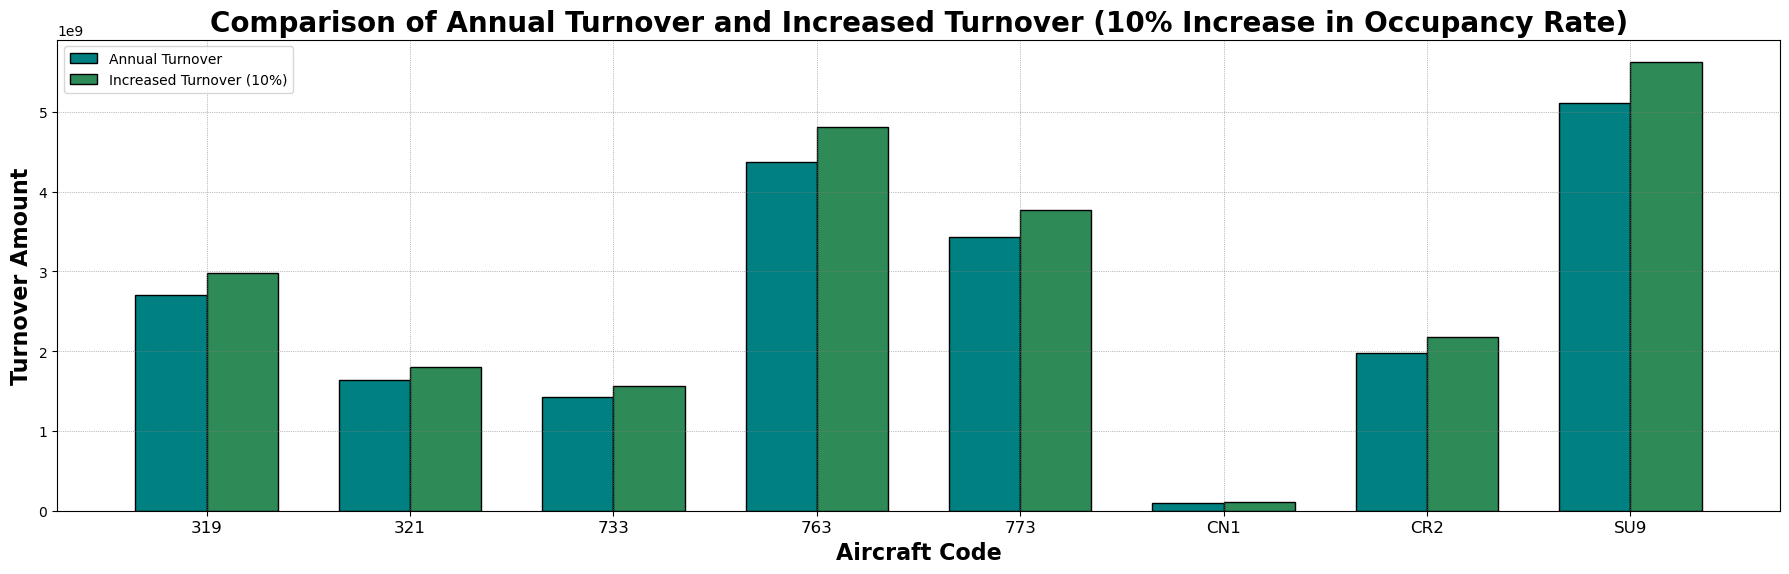

In [51]:
import numpy as np
# Merging the data with the increased annual turnover DataFrame
merged_df = pd.merge(annual_turnover, Occupancy_Rate[['aircraft_code', 'Total Annual Turnover Inc_10']], on='aircraft_code')

# Plotting comparison
plt.figure(figsize=(18, 6))

# Define the width of the bars
bar_width = 0.35
index = np.arange(len(merged_df['aircraft_code']))

# Plotting both annual turnover and increased turnover
bar1 = plt.bar(index, merged_df['total_revenue'], bar_width, label='Annual Turnover', color='teal', edgecolor='black')
bar2 = plt.bar(index + bar_width, merged_df['Total Annual Turnover Inc_10'], bar_width, label='Increased Turnover (10%)', color='seagreen', edgecolor='black')

plt.xlabel('Aircraft Code', fontsize=16, fontweight='bold')
plt.ylabel('Turnover Amount', fontsize=16, fontweight='bold')
plt.title('Comparison of Annual Turnover and Increased Turnover (10% Increase in Occupancy Rate)', fontsize=20, fontweight='bold')

plt.xticks(index + bar_width / 2, merged_df['aircraft_code'], fontsize=12)
plt.legend()
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

**The above figure shows how the total revenue increased after increasing the occupancy rate by 10% and it gives the result that it will increase gradually so airlines should be more focused on the pricing strategies.**